This post roughly follows the process in https://www.studocu.com/en-us/document/pasadena-city-college/elementary-astronomy/measuring-the-hubble-constant-lab/13179507

### Calculating Apparent Size of Galaxy

From https://theskylive.com/sky/deepsky/ngc1832-object#apparentisize,<br>
We are given angular size of ngc1832 in arcmin as 2.46 arcmin

There are 60 minutes of arc in 1 degree,<br>
$1 [degree] = 60[arcmin]$<br>
$\implies 2.46[arcmin] \cdot \frac{1[degree]}{60[arcmin]} = 2.46/60 = ...$

In [3]:
print('A =',2.46/60,'[degrees]')

A = 0.041 [degrees]


### Calculating Distance to Galaxy in Mlyr

Distance in Mlyr $(D) = 4.1/A [Mlyr] = ...$

In [5]:
print('D =', 4.1/.041,'[Mlyr]')

D = 99.99999999999999 [Mlyr]


### Calculating velocity of Galaxy

According to https://www.bbc.co.uk/bitesize/guides/zphppv4/revision/2,
redshift (z)[dimensionless] = velocity of galaxy[km/s] / speed of light constant[km/s] (redshift is given in 10e-3)<br> 
$z\cdot 10^{-3} = \frac{v}{c} \implies v[km/s] = z\cdot 10^{-3} \cdot 299792[km/s]$

A search for "ngc 1832 photometric information" in google sends us to http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC%201832. Querying Simbad with the apparent size in arcmin(2.46) yields an R band (redshift) of 11.07 such that z...

In [9]:
print('v_ngc1832 =',11.07*299792*10**-3,'[km\s]')

v_ngc1832 = 3318.69744 [km\s]


In [11]:
# GET THIS DATA MANUALLY FROM SKYLIVE AND CALCULATIONS ABOVE!
df = pd.DataFrame({'d':[124.24,124.24,49.40,110.81,40.60,82,89.13],'v':[1698,1929,555,2613,555,1014,1242]})
df

<IPython.core.display.Javascript object>

,d,v
0,124.24,1698
1,124.24,1929
2,49.40,555
3,110.81,2613
4,40.60,555
5,82.00,1014
6,89.13,1242


<IPython.core.display.Javascript object>

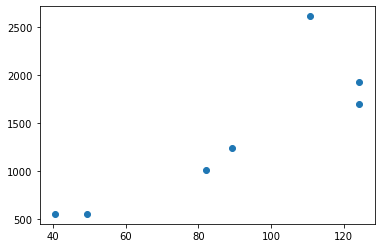

In [12]:
plt.scatter(df['d'],df['v'])

In [15]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [13]:
def lr(X,y):
    """
    Numpy Mean Square Error Method for Univariate Linear Regression.
    
    Returns, in order:
        theta_0, theta_1, y_predictions
    """
    
    # Get the array of parameter values as b from the theory previously demonstrated
    theta = inv( X.T @ X ) @ X.T @ y
    
    return theta[0], theta[1], X @ theta

In [21]:
# Generate the design matrix as a column vector of ones of size vec_len and a column vector of random standard normal values of size vec_len
x_0, x_1 = np.ones(len(df['d'].values)), df['d'].values
    
# Stack the columns together to complete the design matrix
X = np.column_stack((x_0,x_1))

y = df['v'].values

In [30]:
lr(X,y) #Hubble Constant from this approximation is the second number in the array

(-326.1062836142177,
 19.162412535539655,
 array([2054.6318498 , 2054.6318498 ,  620.51689564, 1797.28064945,
         451.88766533, 1245.2115443 , 1381.83954568]))

Text(0, 0.5, 'velocity of galaxies [km/s]')

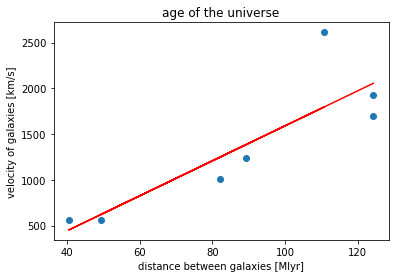

In [27]:
plt.scatter(X[:,1],y)

# Plot of regression line
plt.plot(X[:,1],lr(X,y)[2],c='red', label=');

plt.title('age of the universe')
plt.xlabel('distance between galaxies [Mlyr]')
plt.ylabel('velocity of galaxies [km/s]')

In [37]:
v_at_90mlyr = lr(X,y)[1]*90
v_at_90mlyr

1724.617128198569

In [38]:
hubble_constant = 3.26 * v_at_90mlyr/90
hubble_constant

62.46946486585927

The value for the hubble constant was 73.4 in 2016. This constant is the rate of expansion of the universe in [km\s\Mpc)] (velocity per mega parsec)

In [57]:
print('%error ~',round(np.abs(hubble_constant-73.4)/73.4*100,1),'%')

%error ~ 14.9 %


In [39]:
age_of_universe = 977.86/hubble_constant
print(age_of_universe,'[billions of years]')

15.653407662443716 [billions of years]


Note, the most accurately estimated age of the universe is 13.8$\pm$0.1 billion years so this is a pretty good estimate with only a few datapoints!

In [49]:
print('%error ~',round((age_of_universe-13.8)/13.8*100,1),'%')

%error ~ 13.4 %


Still not bad considering we are using only 5 of the some 100 billion+ known galaxies.<br>
Information regarding the original estimation of the age of the universe by Hubble can be found here: https://www.pnas.org/content/112/11/3173